In [1]:
import algorithms.tensor as tensor

In [2]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

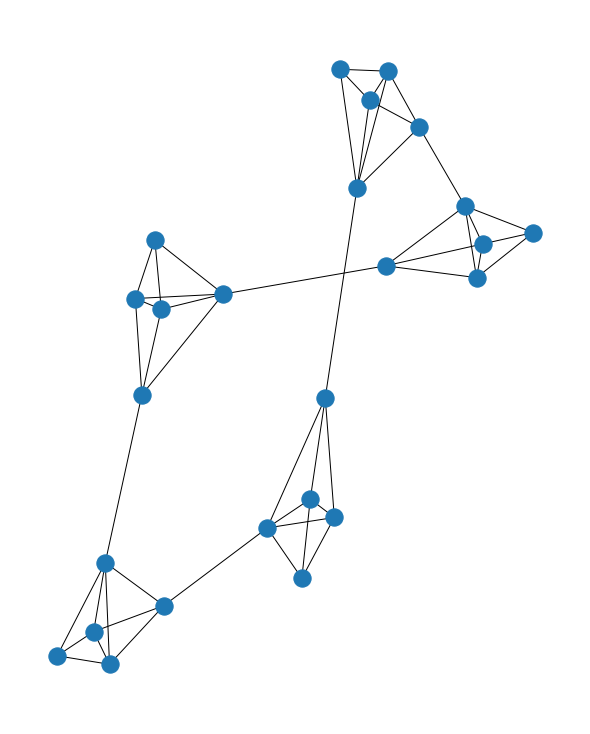

In [18]:
import networkx as nx

G = nx.generators.community.connected_caveman_graph(5, 5)
nx.draw(G)

In [19]:
n = G.number_of_nodes()
edges = np.array([e for e in G.edges])
weights = np.ones(edges.shape[0])

In [20]:
X, _, _ = tensor.laplacian_tensor_clustering(edges, weights, n, k=5)

In [21]:
clusters = tensor.get_clusters(X)

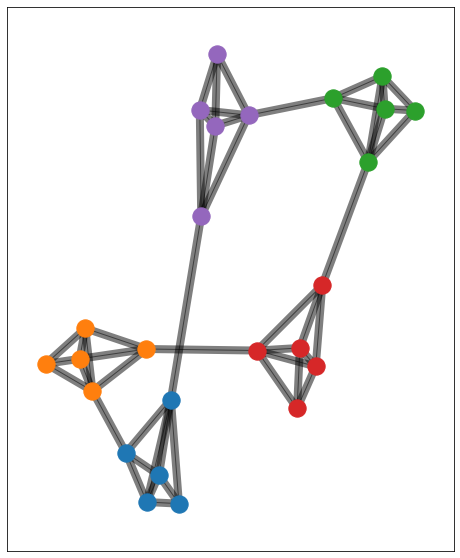

In [22]:
pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx_nodes(G, pos, nodelist=np.arange(n)[clusters == 0], node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=np.arange(n)[clusters == 1], node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=np.arange(n)[clusters == 2], node_color="tab:green")
nx.draw_networkx_nodes(G, pos, nodelist=np.arange(n)[clusters == 3], node_color="tab:purple")
nx.draw_networkx_nodes(G, pos, nodelist=np.arange(n)[clusters == 4], node_color="tab:orange")

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    width=8,
    alpha=0.5,
)


In [3]:
import itertools

def generate_cluster_ring_hypergraph(k, n, r):
    edges = []
    for i in range(k):
        for edge in itertools.combinations(range(i*n, i*n + n), r): 
            edges.append(edge)
        edge = [t for t in range(i*n - r + n + 1, i*n + n)] + [ (i * n + n) % (k * n) ]
        edges.append(edge)

    return np.array(edges)

In [4]:
edges = generate_cluster_ring_hypergraph(5, 5, 4)
weights = np.ones(edges.shape[0])

In [5]:
import hypernetx as hnx
H = hnx.Hypergraph(edges)

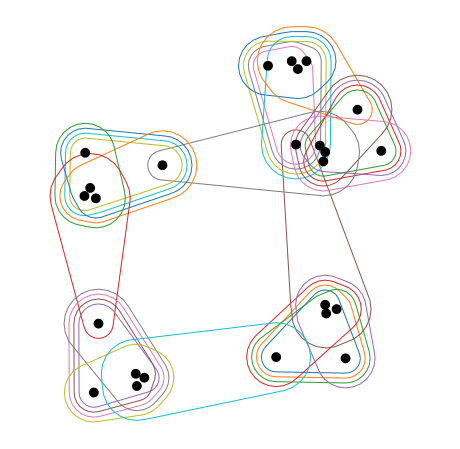

In [22]:
hnx.drawing.draw(H,  nodes_kwargs={'linewidth': 5}, with_edge_labels=False, with_node_labels=False,  layout_kwargs= {'seed': 39})

In [14]:
n = H.number_of_nodes()
X, _, _ = tensor.laplacian_tensor_clustering(edges, weights, n, k=5)
clusters = tensor.get_clusters(X)

In [15]:
clusters

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1], dtype=int32)

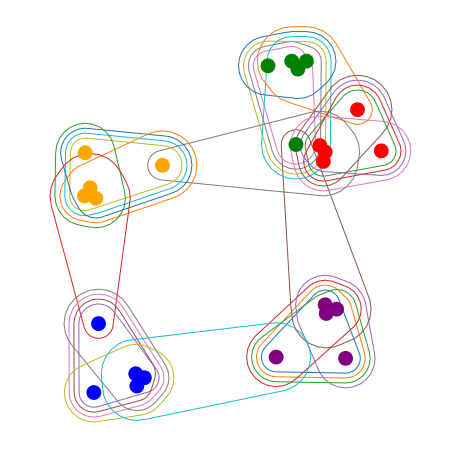

In [23]:
hnx.drawing.draw(H,
    nodes_kwargs={
        'color' : list(np.array(["red", "blue", "green", "purple","orange" ])[clusters]),
        'linewidth': 5
    }, with_edge_labels=False, with_node_labels=False, layout_kwargs= {'seed': 39})